In [1]:
from utils.datareader import DBpediaReader
from utils.datareader import CIFAR100Reader
from deepmf.deepmf import deepmf
from hiernmf2.hier8_neat import hier8_neat
import numpy as np
import matplotlib.pyplot as plt

In [2]:
image_reader = CIFAR100Reader()
image_reader.get_data_matrix()

## 1. Sample of some sub-categories

In [3]:
fine_label_list = image_reader.meta_dict[b'fine_label_names']
coarse_label_list = image_reader.meta_dict[b'coarse_label_names']
fine_label_list = [b.decode() for b in fine_label_list]
coarse_label_list = [b.decode() for b in coarse_label_list]

In [4]:
for i,coarse_label in enumerate(coarse_label_list):
    fine_labels = image_reader.label_sm.fine_labels[image_reader.label_sm.coarse_label == i]
    unique_fine_labels = list(fine_labels.unique())
    unique_fine_labels = [fine_label_list[u] for u in unique_fine_labels]
    print("{}. {}: [{}]".format(str(i),str(coarse_label), ', '.join(unique_fine_labels)))

0. aquatic_mammals: [beaver, dolphin, otter, seal, whale]
1. fish: [aquarium_fish, flatfish, ray, shark, trout]
2. flowers: [orchid, poppy, rose, sunflower, tulip]
3. food_containers: [bottle, bowl, can, cup, plate]
4. fruit_and_vegetables: [apple, mushroom, orange, pear, sweet_pepper]
5. household_electrical_devices: [clock, keyboard, lamp, telephone, television]
6. household_furniture: [bed, chair, couch, table, wardrobe]
7. insects: [bee, beetle, butterfly, caterpillar, cockroach]
8. large_carnivores: [bear, leopard, lion, tiger, wolf]
9. large_man-made_outdoor_things: [bridge, castle, house, road, skyscraper]
10. large_natural_outdoor_scenes: [cloud, forest, mountain, plain, sea]
11. large_omnivores_and_herbivores: [camel, cattle, chimpanzee, elephant, kangaroo]
12. medium_mammals: [fox, porcupine, possum, raccoon, skunk]
13. non-insect_invertebrates: [crab, lobster, snail, spider, worm]
14. people: [baby, boy, girl, man, woman]
15. reptiles: [crocodile, dinosaur, lizard, snake, tu

## 2. Visualize sample data

In [5]:
X=image_reader.X_lg.T*255
X = X.reshape(3000,3,32,32)
X = X.transpose(0,2,3,1).astype(np.uint8)

In [6]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

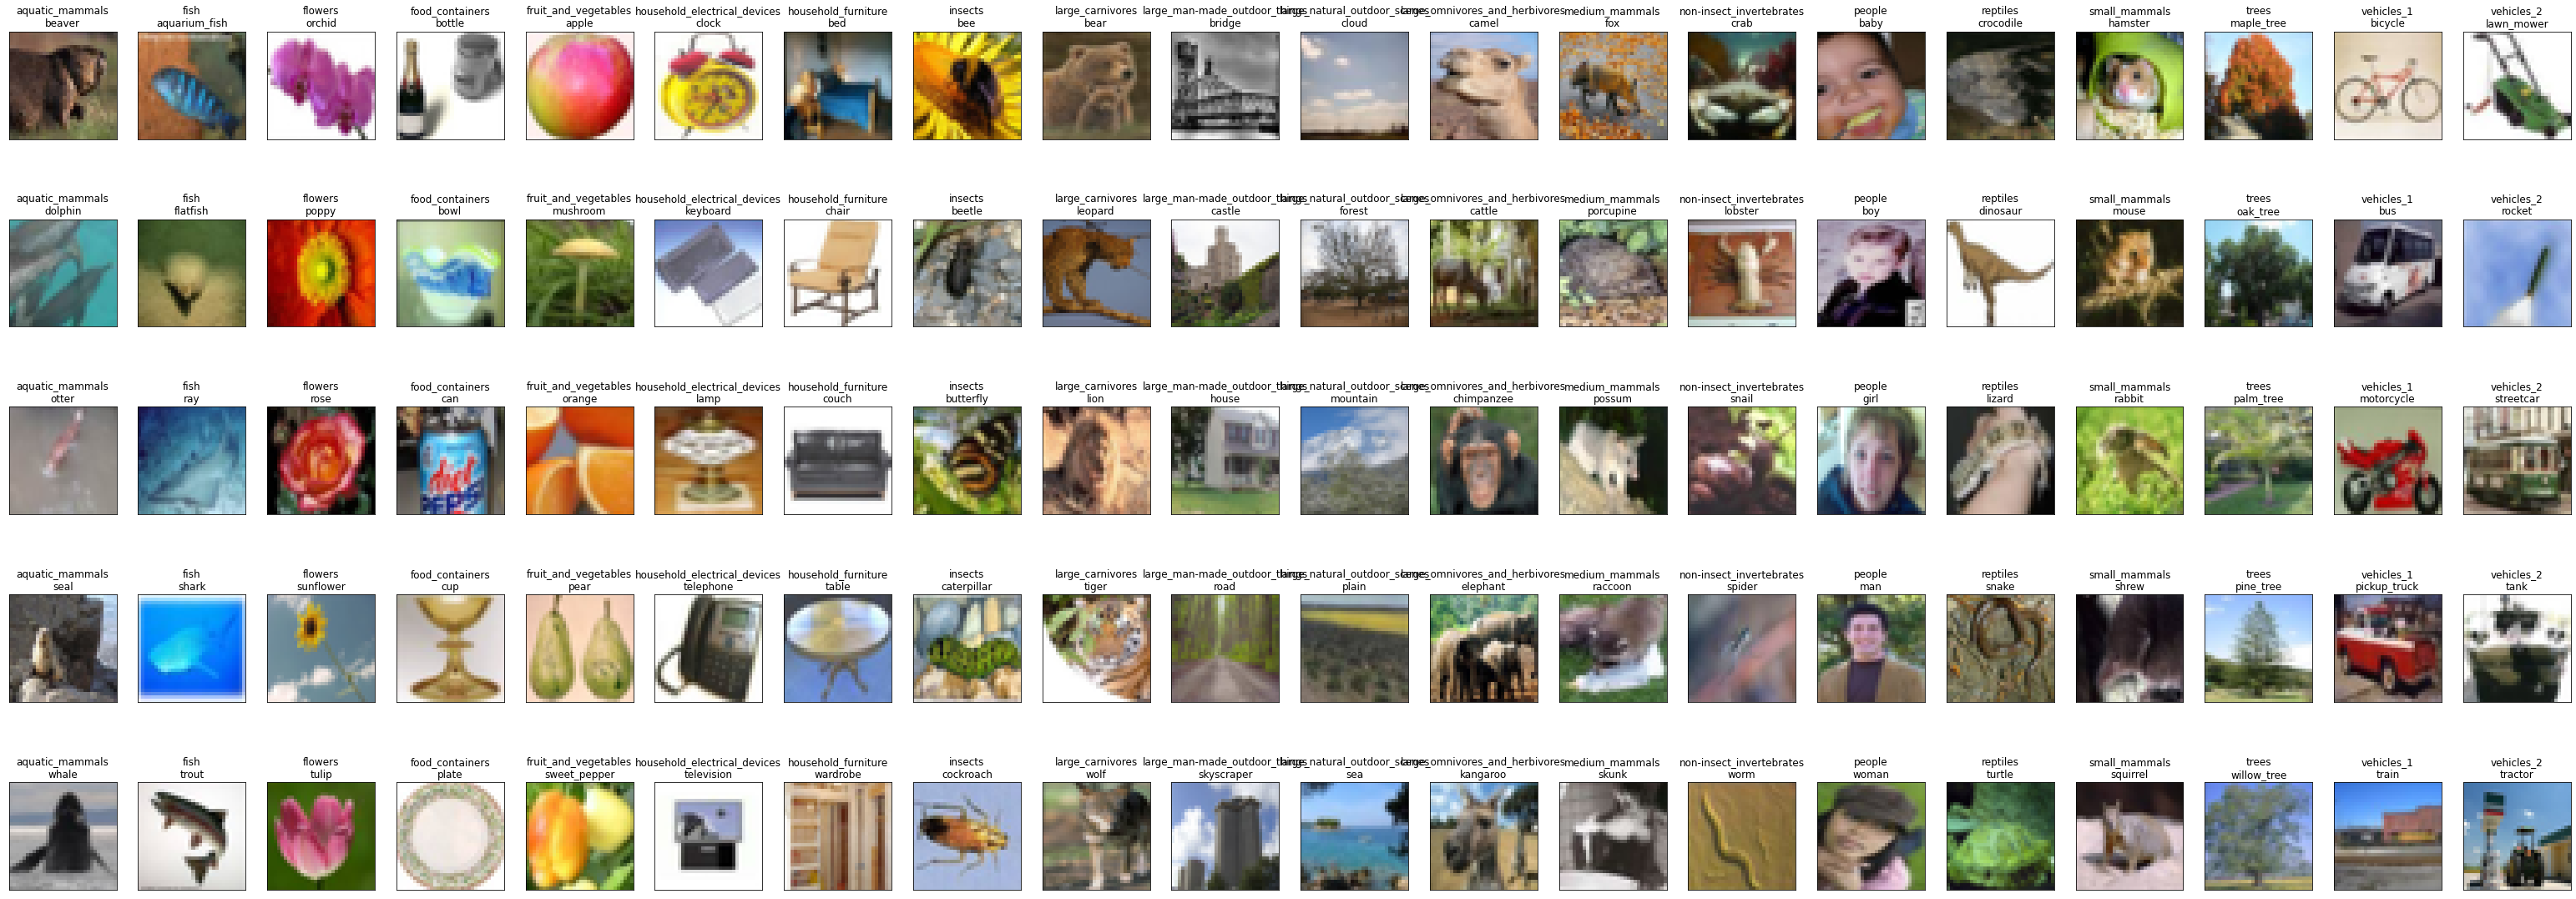

In [7]:
coarse_num = 20
fig=plt.figure(figsize=(55, 20))
for i in range(coarse_num):
    fine_labels = image_reader.label_lg.fine_labels[image_reader.label_lg.coarse_label == i]
    unique_fine_labels = list(fine_labels.unique())
    for j in range(5):
        fl = unique_fine_labels[j]
        sample_id = image_reader.label_lg[(image_reader.label_lg.coarse_label == i) & (image_reader.label_lg.fine_labels == fl)].sample(1).index[0]
        x = X[sample_id]
        fig.add_subplot(5, 20, 20*j+i+1)
        plt.imshow(x)
        plt.xticks([])
        plt.yticks([])
        plt.title("{}\n{}".format(coarse_label_list[i], fine_label_list[fl]))
plt.show()        


## 3. Run NMFs and deep MF  for the data

### 3.1. Run hierNMF2

In [8]:
k=100
tree, splits, is_leaf, clusters, timings, Ws, Hs, priorities = hier8_neat(image_reader.X_sm, k)

IndexError: index 508 is out of bounds for axis 0 with size 508

In [ ]:
tree

In [ ]:
splits

In [11]:
is_leaf

array([0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1])